# E2-6-Evaluate Alternatives With Utility Score

In this version of the game we associate values to each node of the tree.
The goal of the AI player is to move to cells with the __maximum__ value, while the goal of the opponent is __minimum__ loss.

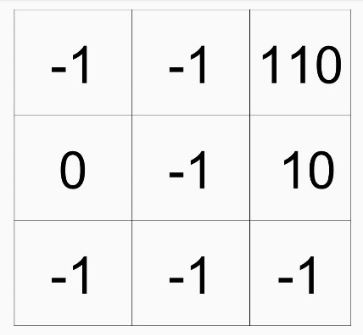

## Initialize The Board

In [1]:
# Initialize the players and signs
EMPTY = '.'
AI = 'X'
HUMAN = 'O'

In [2]:
# print the board, leave an empty lines and spaces for visibility
def print_board(board):
    print(" ")
    print(' '.join(board[:3]))
    print(' '.join(board[3:6]))
    print(' '.join(board[6:]))
    print(" ")

In [3]:
# Initialize the board
board = EMPTY * 9
print_board(board)

 
. . .
. . .
. . .
 


In [4]:
# Define all possible winning combinations
win_cases = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [0, 3, 6],
    [1, 4, 7],
    [2, 5, 8],
    [0, 4, 8],
    [2, 4, 6]
]

## Build the Utility Matrix

We create utility matrix for each state/board, giving values to the cells/possible moves.

In [5]:
# Define the heuristic
p1 = 1    # A move, creating a sign on the board brings 1 point
p2 = 10   # A move, creating two of a kind brings 10 points
p3 = 100  # A move, preventing the opponent from winning the game brings 100 points
p4 = 1000 # A move, creating the three of a kind that win the game brings 1000 points
p0 = -1   # Already occupied cells get a value of -infinity, or -1

In [6]:
# Initialize the values on the board cells
def init_utility_matrix(board):
    return [0 if cell == EMPTY else -1 for cell in board]

In [7]:
init_utility_matrix(board)

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
# Function to generate scores for the empty cells by use of the win cases indeces
def generate_add_score(utilities, i, j, k):
    # i, j, k - the winning triple
    def add_score(points):
        if utilities[i] >= 0: utilities[i] += points
        if utilities[j] >= 0: utilities[j] += points
        if utilities[k] >= 0: utilities[k] += points
    return add_score

In [9]:
# Calculating the scores for any current board
def utility_matrix(board):
    utilities = init_utility_matrix(board)
    for [i, j, k] in win_cases:
        add_score = generate_add_score(utilities, i, j, k)
        triple = [board[i], board[j], board[k]]
        
        # no AI sign yet
        if triple.count(EMPTY) == 3: add_score(p1)
            
        # one AI sign and two empty cells
        elif triple.count(EMPTY) == 2 and triple.count(AI) == 1: add_score(p2)   
        
        if triple.count(EMPTY) == 1:
            # two AI and one winning empty
            if triple.count(AI) == 2: add_score(p4)
            # two signs of the opponent and one defending empty    
            elif triple.count(HUMAN) == 2: add_score(p3)
    return utilities

## Supporting Functions

In [10]:
# A winning game is if any of win-cases occurs
def game_won_by(board):
    for i in win_cases:
        if board[i[0]] == board[i[1]] == board[i[2]] != EMPTY:
            # win-case
            return board[i[0]]
    return EMPTY

In [11]:
def all_possible_moves(board, sign):
    move_list = []
    for i, v in enumerate(board):
        if v == EMPTY:
            move_list.append(board[:i] + sign + board[i+1:])
    return move_list

In [12]:
# Find the best move = the maximal available utility
def best_moves_from_board(board, sign):
    move_list = []
    utilities = utility_matrix(board)
    print(utilities)
    max_utility = max(utilities)    
    for i, v in enumerate(board):
        if utilities[i] == max_utility:
            move_list.append(board[:i] + sign + board[i+1:])  
    print(move_list)
    return move_list

## Play Game

In [13]:
# Human move approach still the same
def human_move(board, row, column):
    # get the index of the cell the user selected: 2D -> 1D 
    index = 3 * (row - 1) + (column - 1)
    #  if this cell is empty, make the user move, otherwise do nothing
    if board[index] == EMPTY:
        # place HUMAN sign on board[index]
        return board[:index] + HUMAN + board[index+1:]
    return board

In [14]:
# AI makes a move from all available SAFE moves
from random import choice
def ai_move(board):
    options = []
    options = best_moves_from_board(board, AI)
    # options = all_possible_moves(board, AI)
    for option in options:
        if game_won_by(option) == AI:
            return option
    return options[0]  

In [35]:
# Play the game
def game():
    # start from empty board
    board = EMPTY * 9
    empty_cell_count = 9
    end_flag = False
    
    while empty_cell_count > 0 and not end_flag:        
        # Player AI (always odd number of options)
        if empty_cell_count % 2 == 1:
            board = ai_move(board)
        else:
            # Human player
            best_moves_from_board(board, HUMAN)
            row = int(input('Enter row: '))
            col = int(input('Enter column: '))
            board = human_move(board, row, col)
            
        # Print current board status    
        print_board(board)
        
        # Check if someone wins already, update the flag
        end_flag = game_won_by(board) != EMPTY
        
        # Count how many empty cells left
        empty_cell_count = board.count(EMPTY)      
        # empty_cell_count = sum(1 for cell in board if cell == EMPTY_SIGN)
     
    print('Game ended. Winner: ', game_won_by(board))

In [38]:
# Run the game
game()

[3, 2, 3, 2, 4, 2, 3, 2, 3]
['....X....']
 
. . .
. X .
. . .
 
[12, 11, 12, 11, -1, 11, 12, 11, 12]
['O...X....', '..O.X....', '....X.O..', '....X...O']
Enter row: 1
Enter column: 1
 
O . .
. X .
. . .
 
[-1, 10, 11, 10, -1, 11, 11, 11, 2]
['O.X.X....', 'O...XX...', 'O...X.X..', 'O...X..X.']
 
O . X
. X .
. . .
 
[-1, 10, -1, 10, -1, 20, 1001, 11, 11]
['O.X.X.O..']
Enter row: 3
Enter column: 3
 
O . X
. X .
. . O
 
[-1, 10, -1, 10, -1, 10, 1000, 10, -1]
['O.X.X.X.O']
 
O . X
. X .
X . O
 
Game ended. Winner:  X


## Game Analysis

In [94]:
# All moves for all possible states for this player
def all_moves(board_list, sign):
    move_list = []
    get_moves = best_moves_from_board if sign == AI else all_possible_moves
    for board in board_list:
        move_list.extend(get_moves(board, sign))
    return move_list

In [95]:
# All wins of each player separated in two new lists, draws remains in the old list
def player_wins(move_list, ai_wins, human_wins):
    for board in move_list:
        won_by = game_won_by(board)
        if won_by == AI:
            ai_wins.append(board)
            move_list.remove(board)
        elif won_by == HUMAN:
            human_wins.append(board)
            move_list.remove(board)

In [96]:
# At each step count the available moves
def count_possibilities():
    board = EMPTY * 9
    move_list = [board]
    ai_wins = []
    human_wins = []
    for i in range(9):
        print('Step ' + str(i) + ': possible moves = ' + str(len(move_list)))
        sign = AI if i % 2 == 0 else HUMAN
        move_list = all_moves(move_list, sign)
        player_wins(move_list, ai_wins, human_wins)
    print('First player wins: ' + str(len(ai_wins)))
    print('Second player wins: ' + str(len(human_wins)))
    print('Draw', str(len(move_list)))
    print('Total', str(len(ai_wins) + len(human_wins) + len(move_list)))
    print('Human wins: ', human_wins)

In [97]:
count_possibilities()

Step 0: possible moves = 1
[3, 2, 3, 2, 4, 2, 3, 2, 3]
['....X....']
Step 1: possible moves = 1
Step 2: possible moves = 8
[-1, 10, 11, 10, -1, 11, 11, 11, 2]
['O.X.X....', 'O...XX...', 'O...X.X..', 'O...X..X.']
[11, -1, 11, 11, -1, 11, 12, 1, 12]
['.O..X.X..', '.O..X...X']
[11, 10, -1, 11, -1, 10, 2, 11, 11]
['X.O.X....', '..OXX....', '..O.X..X.', '..O.X...X']
[11, 11, 12, -1, -1, 1, 11, 11, 12]
['..XOX....', '...OX...X']
[12, 11, 11, 1, -1, -1, 12, 11, 11]
['X...XO...', '....XOX..']
[11, 11, 2, 10, -1, 11, -1, 10, 11]
['X...X.O..', '.X..X.O..', '....XXO..', '....X.O.X']
[12, 1, 12, 11, -1, 11, 11, -1, 11]
['X...X..O.', '..X.X..O.']
[2, 11, 11, 11, -1, 10, 11, 10, -1]
['.X..X...O', '..X.X...O', '...XX...O', '....X.X.O']
Step 3: possible moves = 24
Step 4: possible moves = 144
[-1, -1, -1, 10, -1, 20, 1001, 1, 11]
['OOX.X.X..']
[-1, 10, -1, -1, -1, 10, 1101, 11, 11]
['O.XOX.X..']
[-1, 10, -1, 0, -1, -1, 1001, 11, 1]
['O.X.XOX..']
[-1, 10, -1, 110, -1, 20, -1, 10, 10]
['O.XXX.O..']
[-1,